In [10]:
# -------------------------------
# Assignment 9: Neural Network (ANN Baseline)
# Credit Card Fraud Detection
# -------------------------------

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from tkinter import Tk
from tkinter.filedialog import askopenfilename


In [11]:
# 2️⃣ Load Dataset Using File Picker
Tk().withdraw()  # hide main tkinter window
filename = askopenfilename(title="Select your creditcard_cleaned.csv")
df = pd.read_csv(filename)

# Show basic info
print("Dataset Shape:", df.shape)
print(df.head())
print(df['Class'].value_counts())



Dataset Shape: (85309, 31)
       Time        V1        V2        V3        V4        V5        V6  \
0  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
1  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
2  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
3   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
4    6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -2.737844 -3.543314 -0.483147  ...  4.328165 -2.167329  1.022567 -0.241143   
1  1.369769 -0.133535 -0.957100  ...  0.133048  0.499501 -0.392572 -0.393364   
2  0.190403  0.161493  0.840595  ...  0.318037 -0.760732 -0.181332  0.595866   
3  0.029460 -0.079962  0.227173  ... -0.379270 -1.148959 -0.047403 -1.074464   
4 -0.825094  0.163280  2.301808  ... -0.216512 -0.195607  0.072785  0.045625   

        V25       V26       V27       V28

In [12]:
# 3️⃣ Preprocessing

# Drop unnecessary columns if they exist
columns_to_drop = ['TransactionID', 'TransactionDate']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split (stratify to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [13]:
# 4️⃣ Build & Train MLP (ANN-like) Model
model = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    max_iter=100,
    random_state=42
)

model.fit(X_train_scaled, y_train)
print("Model training completed.")



Model training completed.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17033
           1       0.92      0.76      0.83        29

    accuracy                           1.00     17062
   macro avg       0.96      0.88      0.91     17062
weighted avg       1.00      1.00      1.00     17062

ROC-AUC Score: 0.9957587401332505


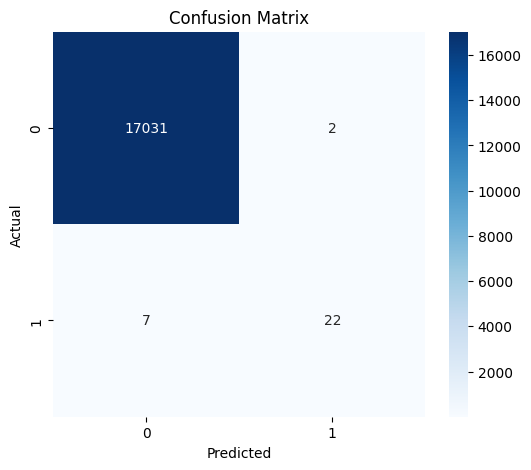

In [14]:
# 5️⃣ Evaluate Model

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
